<a href="https://colab.research.google.com/github/jimitogni/ml_study/blob/master/monkeys_bread_inceptionres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os

In [0]:
os.environ['KAGLE_USERNAME']= "jimitogni"
os.environ['KAGLE_KEY']= "aea778a52ae308a26e4ad5dad779ada9"

In [0]:
%%shell

export KAGGLE_USERNAME=jimitogni
export KAGGLE_KEY=aea778a52ae308a26e4ad5dad779ada9

kaggle datasets download slothkong/10-monkey-species

In [0]:
!unzip 10-monkey-species.zip

In [0]:
from keras.applications import MobileNet, InceptionResNetV2, DenseNet201, VGG16
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPool2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

#keras.applications.mobilenet.MobileNet(input_shape=None, alpha=1.0, depth_multiplier=1, dropout=1e-3, include_top=True, weights='imagenet', input_tensor=None, pooling=None, classes=1000)
#keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)


In [0]:
#criando o nosso top layer
def addTopModel(bottom_model, num_classes):
  top_model = bottom_model.output
  top_model = GlobalAveragePooling2D()(top_model)
  top_model = Dense(1024, activation='relu')(top_model)
  top_model = Dense(1024, activation='relu')(top_model)
  top_model = Dense(512, activation='relu')(top_model)
  top_model = Dropout(0,2)(top_model)
  top_model = Dense(num_classes, activation='softmax')(top_model)

  return top_model

# ResNet

In [9]:
#Resnet
img_rows, img_cols = 224, 224

MobileNet = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) #largura, altura, 3=RGB colorido

for layer in MobileNet.layers:
  layer.trainable=False


17227776/17225924 [==============================] - 1s 0us/step


# InceptionResNetV2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_204 (Conv2D)             (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
batch_normalization_204 (BatchN (None, 111, 111, 32) 96          conv2d_204[0][0]                 
__________________________________________________________________________________________________
activation_204 (Activation)     (None, 111, 111, 32) 0           batch_normalization_204[0][0]    
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/100
34/34 [==============================] - 53s 2s/step - loss: 1.2190 - accuracy: 0.5788 - val_loss: 0.6402 - val_accuracy: 0.7500

Epoch 00001: val_loss improved from inf to 0.64022, saving model to macacos_modelo.h5
Epoch 2/100
34/34 [==============================] - 44s 1s/step - loss: 0.5545 - accuracy: 0.8189 - val_loss: 0.8894 - val_accuracy: 0.9042

Epoch 00002: val_loss did not improve from 0.64022
Epoch 3/100
34/34 [==============================] - 44s 1s/step - loss: 0.4811 - accuracy: 0.8428 - val_loss: 1.0027 - val_accuracy: 0.8375

Epoch 00003: val_loss did not improve from 0.64022
Epoch 4/100
34/34 [==============================] - 43s 1s/step - loss: 0.4630 - accuracy: 0.8544 - val_loss: 0.7656 - val_accuracy: 0.9292

Epoch 00004: val_loss did not improve from 0.64022
Epoch 5/100
34/34 [==============================] - 41s 1s/step - loss: 0.4915 - accuracy: 0.8452 - val_loss: 0.2600 - val_accuracy: 0.9250

Epoch 00005: val_loss improved from 0.64022 to 0.26

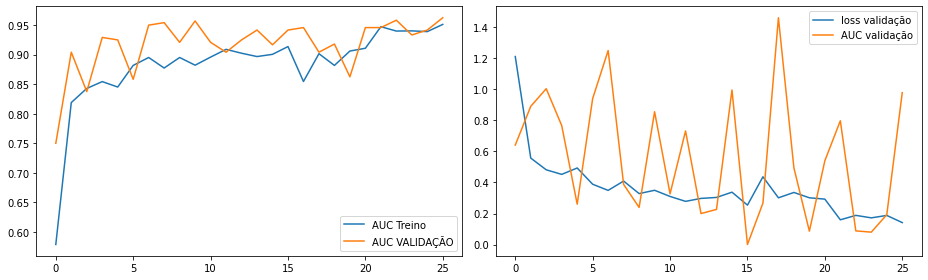



Com os valores:
batch size: 32 - Epocas: 100


In [30]:
#InceptionResNetV2
#keras.applications.densenet.DenseNet201(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
#DenseNet201
#keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
#VGG16
img_rows, img_cols = 224, 224

InceptionResNetV2 = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) #largura, altura, 3=RGB colorido

for layer in InceptionResNetV2.layers:
  layer.trainable=False

num_classes = 10

FC = addTopModel(InceptionResNetV2, num_classes) #MobileNet = bottom_model
model = Model(input=InceptionResNetV2.input, output=FC) #bottom layers, top layer

model.summary()

train_data_dir = '/content/training/training/'
validation_data_dir = '/content/validation/validation/'

#data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

#nao faz data aug
validation_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                              target_size=(img_rows, img_cols),
                                                              batch_size=batch_size,
                                                              class_mode='categorical')

from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('macacos_modelo.h5',
                             monitor='val_loss',
                             mode=min,
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          verbose=1,
                          restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=5,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.0001)

callbacks = [checkpoint, earlystop, learning_rate_reduction]

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('macacos_modelo.h5',
                             monitor='val_loss',
                             mode=min,
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          verbose=1,
                          restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=5,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.0001)

callbacks = [checkpoint, earlystop, learning_rate_reduction]

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

nb_train_samples = 1098
nb_validation_samples = 272

epochs = 100
batch_size = 32

history = model.fit_generator(train_generator,
                              steps_per_epoch=nb_train_samples//batch_size,
                              epochs=epochs,
                              callbacks=callbacks,
                              validation_data=validation_generator,
                              validation_steps=nb_validation_samples//batch_size)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import os

print()
print("------ RESULTADOS ------")
print()
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="AUC Treino")
plt.plot(history.history['val_accuracy'], label="AUC VALIDAÇÃO")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="loss validação")
plt.plot(history.history['val_loss'], label="AUC validação")
plt.legend()
plt.tight_layout()
plt.show()

print()
# Evaluate the model
#scores = history.history.evaluate_generator(test_generator)
#print("\n%s: %.2f%%" % (history.metrics_names[1], scores[1]*100))

print()
print("Com os valores:")
print("batch size: {} - Epocas: {}".format(batch_size, epochs))

# DenseNet201

74842112/74836368 [==============================] - 7s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/50
34/34 [==============================] - 151s 4s/step - loss: 1.2249 - accuracy: 0.6398 - val_loss: 111.1847 - val_accuracy: 0.2148

Epoch 00001: val_loss improved from inf to 111.18468, saving model to macacos_modelo.h5
Epoch 2/50
34/34 [==============================] - 60s 2s/step - loss: 0.8417 - accuracy: 0.7542 - val_loss: 65.6265 - val_accuracy: 0.1042

Epoch 00002: val_loss improved from 111.18468 to 65.62649, saving model to macacos_modelo.h5
Epoch 3/50
34/34 [==============================] - 58s 2s/step - loss: 0.6990 - accuracy: 0.7983 - val_loss: 24.0417 - val_accuracy: 0.3583

Epoch 00003: val_loss improved from 65.62649 to 24.04171, saving model to macacos_modelo.h5
Epoch 4/50
34/34 [==============================] - 57s 2s/step - loss: 0.4646 - accuracy: 0.8687 - val_loss: 3.0511 - val_accuracy: 0.5292

Epoch 00004: val_loss improved from 24.04171 to 3.05111, saving model to macacos_modelo.h5
Epoch 5/50
34/34 [==============================] - 56s 2s/step - l

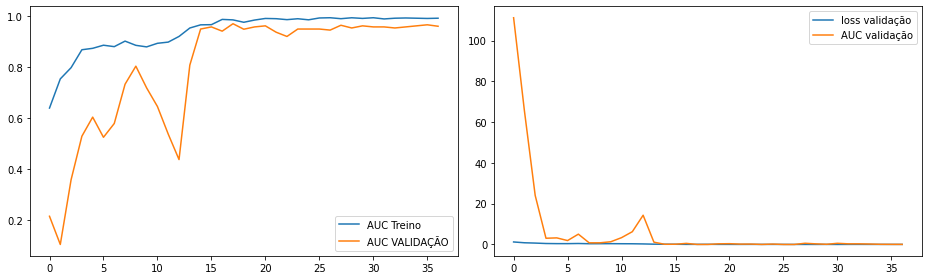



Com os valores:
batch size: 32 - Epocas: 50


In [29]:
#keras.applications.densenet.DenseNet201(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
#DenseNet201
#keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
#VGG16
img_rows, img_cols = 224, 224

DenseNet201 = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) #largura, altura, 3=RGB colorido

for layer in VGG16.layers:
  layer.trainable=False

num_classes = 10

FC = addTopModel(DenseNet201, num_classes) #MobileNet = bottom_model
model = Model(input=DenseNet201.input, output=FC) #bottom layers, top layer

model.summary()

train_data_dir = '/content/training/training/'
validation_data_dir = '/content/validation/validation/'

#data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

#nao faz data aug
validation_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                              target_size=(img_rows, img_cols),
                                                              batch_size=batch_size,
                                                              class_mode='categorical')

from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('macacos_modelo.h5',
                             monitor='val_loss',
                             mode=min,
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          verbose=1,
                          restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=5,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.0001)

callbacks = [checkpoint, earlystop, learning_rate_reduction]

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('macacos_modelo.h5',
                             monitor='val_loss',
                             mode=min,
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          verbose=1,
                          restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=5,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.0001)

callbacks = [checkpoint, earlystop, learning_rate_reduction]

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

nb_train_samples = 1098
nb_validation_samples = 272

epochs = 50
batch_size = 32

history = model.fit_generator(train_generator,
                              steps_per_epoch=nb_train_samples//batch_size,
                              epochs=epochs,
                              callbacks=callbacks,
                              validation_data=validation_generator,
                              validation_steps=nb_validation_samples//batch_size)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import os

print()
print("------ RESULTADOS ------")
print()
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="AUC Treino")
plt.plot(history.history['val_accuracy'], label="AUC VALIDAÇÃO")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="loss validação")
plt.plot(history.history['val_loss'], label="AUC validação")
plt.legend()
plt.tight_layout()
plt.show()

print()
# Evaluate the model
#scores = history.history.evaluate_generator(test_generator)
#print("\n%s: %.2f%%" % (history.metrics_names[1], scores[1]*100))

print()
print("Com os valores:")
print("batch size: {} - Epocas: {}".format(batch_size, epochs))

# VGG16

In [0]:
#keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
#VGG16
img_rows, img_cols = 224, 224

VGG16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) #largura, altura, 3=RGB colorido

for layer in VGG16.layers:
  layer.trainable=False

In [0]:
# lista as camadas que definimos para usar com entrada 0 InputLayer False
# todos estão como false, pois não vamos treina-los, quando utilizamos "layer.trainable=False" acima
for (i, layer) in enumerate(InceptionResNetV2.layers): #pega os layers da mobilenet e coloca em payer e o i fica como index
  print(str(i),layer.__class__.__name__,layer.trainable)

In [0]:
num_classes = 10

FC = addTopModel(InceptionResNetV2, num_classes) #MobileNet = bottom_model
model = Model(input=InceptionResNetV2.input, output=FC) #bottom layers, top layer

model.summary()

In [0]:
train_data_dir = '/content/training/training/'
validation_data_dir = '/content/validation/validation/'

In [9]:
#data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

#nao faz data aug
validation_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                              target_size=(img_rows, img_cols),
                                                              batch_size=batch_size,
                                                              class_mode='categorical')

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [10]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('macacos_modelo.h5',
                             monitor='val_loss',
                             mode=min,
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          verbose=1,
                          restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=5,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.0001)

callbacks = [checkpoint, earlystop, learning_rate_reduction]

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


In [0]:
nb_train_samples = 1098
nb_validation_samples = 272

epochs = 50
batch_size = 32

In [12]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=nb_train_samples//batch_size,
                              epochs=epochs,
                              callbacks=callbacks,
                              validation_data=validation_generator,
                              validation_steps=nb_validation_samples//batch_size)

Epoch 1/50
34/34 [==============================] - 52s 2s/step - loss: 1.4436 - accuracy: 0.5450 - val_loss: 1.2777 - val_accuracy: 0.7109

Epoch 00001: val_loss improved from inf to 1.27770, saving model to macacos_modelo.h5
Epoch 2/50
34/34 [==============================] - 41s 1s/step - loss: 0.6728 - accuracy: 0.7861 - val_loss: 1.1036 - val_accuracy: 0.8542

Epoch 00002: val_loss improved from 1.27770 to 1.10357, saving model to macacos_modelo.h5
Epoch 3/50
34/34 [==============================] - 40s 1s/step - loss: 0.4834 - accuracy: 0.8274 - val_loss: 0.5037 - val_accuracy: 0.8500

Epoch 00003: val_loss improved from 1.10357 to 0.50373, saving model to macacos_modelo.h5
Epoch 4/50
34/34 [==============================] - 41s 1s/step - loss: 0.6359 - accuracy: 0.8058 - val_loss: 0.1052 - val_accuracy: 0.9250

Epoch 00004: val_loss improved from 0.50373 to 0.10517, saving model to macacos_modelo.h5
Epoch 5/50
34/34 [==============================] - 41s 1s/step - loss: 0.3978 -


------ RESULTADOS ------



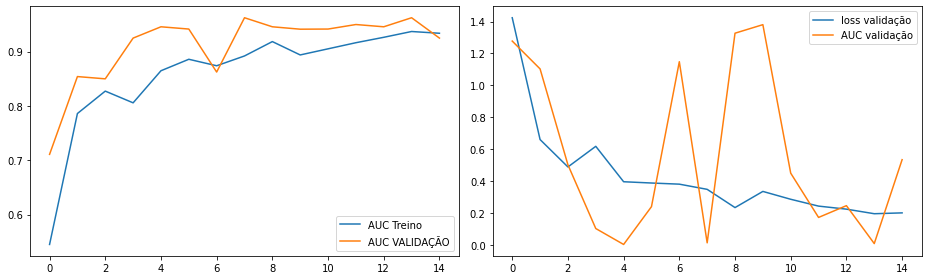



Com os valores:
batch size: 32 - Epocas: 50


In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import os

print()
print("------ RESULTADOS ------")
print()
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="AUC Treino")
plt.plot(history.history['val_accuracy'], label="AUC VALIDAÇÃO")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="loss validação")
plt.plot(history.history['val_loss'], label="AUC validação")
plt.legend()
plt.tight_layout()
plt.show()

print()
# Evaluate the model
#scores = history.history.evaluate_generator(test_generator)
#print("\n%s: %.2f%%" % (history.metrics_names[1], scores[1]*100))

print()
print("Com os valores:")
print("batch size: {} - Epocas: {}".format(batch_size, epochs))

# Geral "TESTE COM VGG"

58892288/58889256 [==============================] - 6s 0us/step
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


Found 272 images belonging to 10 classes.


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:680: RuntimeWarning: ModelCheckpoint mode <built-in function min> is unknown, fallback to auto mode.
  RuntimeWarning)


Epoch 1/50
34/34 [==============================] - 44s 1s/step - loss: 2.2528 - accuracy: 0.1700 - val_loss: 2.0903 - val_accuracy: 0.2305

Epoch 00001: val_loss improved from inf to 2.09034, saving model to macacos_modelo.h5
Epoch 2/50
34/34 [==============================] - 43s 1s/step - loss: 1.9293 - accuracy: 0.3036 - val_loss: 1.9105 - val_accuracy: 0.2875

Epoch 00002: val_loss improved from 2.09034 to 1.91053, saving model to macacos_modelo.h5
Epoch 3/50
34/34 [==============================] - 39s 1s/step - loss: 1.6556 - accuracy: 0.4053 - val_loss: 1.5610 - val_accuracy: 0.4708

Epoch 00003: val_loss improved from 1.91053 to 1.56102, saving model to macacos_modelo.h5
Epoch 4/50
34/34 [==============================] - 39s 1s/step - loss: 1.4532 - accuracy: 0.4653 - val_loss: 1.3468 - val_accuracy: 0.5625

Epoch 00004: val_loss improved from 1.56102 to 1.34683, saving model to macacos_modelo.h5
Epoch 5/50
34/34 [==============================] - 39s 1s/step - loss: 1.2701 -

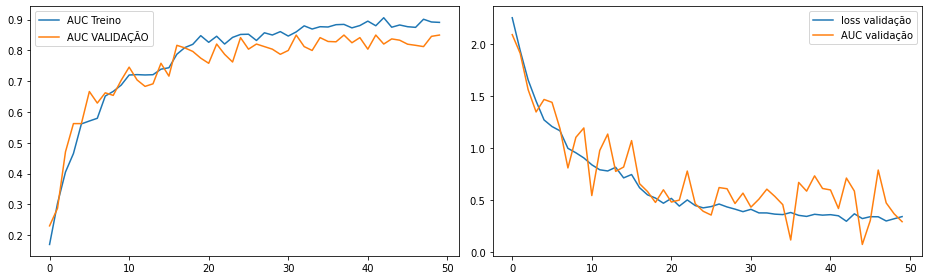



Com os valores:
batch size: 32 - Epocas: 50


In [28]:
#keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
#VGG16
img_rows, img_cols = 224, 224

VGG16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) #largura, altura, 3=RGB colorido

for layer in VGG16.layers:
  layer.trainable=False

num_classes = 10

FC = addTopModel(VGG16, num_classes) #MobileNet = bottom_model
model = Model(input=VGG16.input, output=FC) #bottom layers, top layer

model.summary()

train_data_dir = '/content/training/training/'
validation_data_dir = '/content/validation/validation/'

#data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.3,
                                   height_shift_range=0.3,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

#nao faz data aug
validation_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                              target_size=(img_rows, img_cols),
                                                              batch_size=batch_size,
                                                              class_mode='categorical')

from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('macacos_modelo.h5',
                             monitor='val_loss',
                             mode=min,
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          verbose=1,
                          restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=5,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.0001)

callbacks = [checkpoint, earlystop, learning_rate_reduction]

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('macacos_modelo.h5',
                             monitor='val_loss',
                             mode=min,
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          verbose=1,
                          restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',
                                            patience=5,
                                            verbose=1,
                                            factor=0.2,
                                            min_lr=0.0001)

callbacks = [checkpoint, earlystop, learning_rate_reduction]

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

nb_train_samples = 1098
nb_validation_samples = 272

epochs = 100
batch_size = 32

history = model.fit_generator(train_generator,
                              steps_per_epoch=nb_train_samples//batch_size,
                              epochs=epochs,
                              callbacks=callbacks,
                              validation_data=validation_generator,
                              validation_steps=nb_validation_samples//batch_size)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import os

print()
print("------ RESULTADOS ------")
print()
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="AUC Treino")
plt.plot(history.history['val_accuracy'], label="AUC VALIDAÇÃO")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="loss validação")
plt.plot(history.history['val_loss'], label="AUC validação")
plt.legend()
plt.tight_layout()
plt.show()

print()
# Evaluate the model
#scores = history.history.evaluate_generator(test_generator)
#print("\n%s: %.2f%%" % (history.metrics_names[1], scores[1]*100))

print()
print("Com os valores:")
print("batch size: {} - Epocas: {}".format(batch_size, epochs))

# Testes

In [0]:
# TESTANDO

In [0]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

model = load_model('/content/macacos_modelo.h5')

img_rows, img_cols = 224, 224

In [0]:
class_labels = [
	'mantled_howler', 
	'patas_monkey', 
	'bald_uakari', 
	'japanese_macaque', 
	'pygmy_marmoset', 
	'white_headed_capuchin',
	'silvery_marmoset',
	'common_squirrel_monkey', 
	'black_headed_night_monkey',
	'nilgiri_langur' 
	]

In [0]:
def check(patch):
  #prediction
  img = image.load_img(patch, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = x.astype('float32')/255
  pred = np.argmax(model.predict(x))

  print("isso é um = {} ".format(class_labels[pred]))

In [23]:
!wget url -P /content/macacos/ https://www.monkeyworlds.com/wp-content/uploads/pygmy.jpg


--2020-05-04 16:40:50--  http://url/
Resolving url (url)... failed: Name or service not known.
wget: unable to resolve host address ‘url’
--2020-05-04 16:40:50--  https://www.monkeyworlds.com/wp-content/uploads/pygmy.jpg
Resolving www.monkeyworlds.com (www.monkeyworlds.com)... 159.203.148.90
Connecting to www.monkeyworlds.com (www.monkeyworlds.com)|159.203.148.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39103 (38K) [image/jpeg]
Saving to: ‘/content/macacos/pygmy.jpg’

pygmy.jpg           100%[===================>]  38.19K  --.-KB/s    in 0s      

2020-05-04 16:40:52 (341 MB/s) - ‘/content/macacos/pygmy.jpg’ saved [39103/39103]

FINISHED --2020-05-04 16:40:52--
Total wall clock time: 1.5s
Downloaded: 1 files, 38K in 0s (341 MB/s)


In [0]:
check('/content/macacos/pygmy.jpg')

isso é um = pygmy_marmoset 


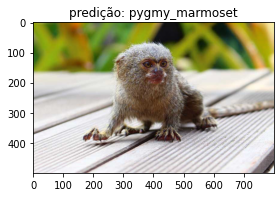

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import os

#auxilia ao plotar imagens
counter = 1
num = 15
#print(type(train_dir))

fig = plt.figure(figsize=(25,20))
#print("antes do for")
#print("list_dir train_dir = {}".format(os.listdir(train_dir)))
#print("train_dir + file = {}".format(os.listdir(train_dir + file)))

for file in os.listdir('/content/macacos/'):
  #print('dataset/train/covid/' + file)
  if file.endswith(".jpg"):
    #print("passou no if 1")
    if counter == num:
      #print("parrou no if 2 - nao achou nada")
      break

    #print("chegou até o final do for")

    img = image.load_img('/content/macacos/' + file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x.astype('float32')/255
    pred = np.argmax(model.predict(x))

    img_name = mpimg.imread('/content/macacos/' + file)
    plt.subplot(4,5,counter)
    plt.title("predição: {}".format(class_labels[pred]))
    imgplot = plt.imshow(img_name)

    counter += 1
    #print("chegou até o final do for")